In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import os
import ipywidgets as widgets

import pyclesperanto_prototype as cle
from scipy import ndimage
import napari
import tifffile

/home/natalia/miniconda3/envs/ia_tutorial/lib/python3.11/site-packages/pytools/persistent_dict.py:52: RecommendedHashNotFoundWarning: Unable to import recommended hash 'siphash24.siphash13', falling back to 'hashlib.sha256'. Run 'python3 -m pip install siphash24' to install the recommended hash.
  warn("Unable to import recommended hash 'siphash24.siphash13', "


# GPU device

In [2]:
device = cle.get_device()
print("Device name:", device.name)

Device name: NVIDIA GeForce RTX 4090


# Load image (can be ignored for the first read)

## Information about the image from metadata)

In [3]:
channels = {
            "fgf":   0, 
            "shh":   1
           }


# Voxel size
pixel_size_x, pixel_size_y, pixel_size_z = 2*0.9019, 2*0.9019, 2*3.9991

## Fixed values for image preprocessing

In [4]:
pixel_size_aim_user_def = 8e-6 # pixel size for binning
sigma = 1.25                      # for gauss filter before thresholding

## Load files

In [5]:
folder = r'example_images/nl/'

In [6]:
ch_paths = []

# Traverse the directory tree to find matching files
for root, dirs, files in os.walk(folder, topdown=False):
    for current_file in files:
        ch_paths.append(os.path.join(root, current_file))

In [7]:
ch_paths = sorted(
    ch_paths,
    key = lambda c: c.split('/c')[1].split('_')[0]
)

In [8]:
img = []
for path in ch_paths:
    i = tifffile.imread(path)
    img.append(i[::, ::, ::])
img = np.array(img).astype( np.uint16 )

img = dict(zip(channels, img))

## Binning

In [9]:
print('physical pixels sizes x, y, z:   ', pixel_size_x, pixel_size_y, pixel_size_z)

pixel_size_z = pixel_size_z * 1e-6
pixel_size_y = pixel_size_y * 1e-6
pixel_size_x = pixel_size_x * 1e-6

pixel_size = np.array([pixel_size_z, -pixel_size_y, pixel_size_x]) # (ez, ey, ex) corresponds k, i, j table indexes

print('downsamples pixels sizes x, y, z:', pixel_size_x, pixel_size_y, pixel_size_z)

physical pixels sizes x, y, z:    1.8038 1.8038 7.9982
downsamples pixels sizes x, y, z: 1.8038e-06 1.8038e-06 7.998199999999999e-06


In [10]:
print('make isotropic')

pixel_size_aim = pixel_size_aim_user_def

scaling_x= pixel_size_x/pixel_size_aim
scaling_y= pixel_size_y/pixel_size_aim
scaling_z= pixel_size_z/pixel_size_aim

print('original pixel sizes x y z', pixel_size_x, pixel_size_y, pixel_size_z )
print('scaling facttors x y z', scaling_x, scaling_y, scaling_z)

make isotropic
original pixel sizes x y z 1.8038e-06 1.8038e-06 7.998199999999999e-06
scaling facttors x y z 0.225475 0.225475 0.999775


In [11]:
for key in img:
    img[key] = cle.scale(img[key], None, scaling_x, scaling_y, scaling_z, centered=False, auto_size=True, linear_interpolation=True)
    img[key] = (np.array(img[key])).astype( np.uint16 )

pixel_size = np.array([pixel_size_aim, -pixel_size_aim, pixel_size_aim])

# Launch napari to preprocess with napari assistant

In [12]:
image_2d = img['shh'][12, :, :]

In [13]:
viewer = napari.Viewer()  

viewer.add_image( image_2d )

Assistant skips harvesting pyclesperanto as it's not installed.


<Image layer 'image_2d' at 0x7f634dfcb6d0>

In [14]:
# code generated by napari-assistant

from skimage.io import imread
import stackview
import pyclesperanto_prototype as cle  # version 0.24.5
import napari
if 'viewer' not in globals():
    viewer = napari.Viewer()

image0_i2 = viewer.layers['image_2d'].data

# gaussian blur

image1_gbp = cle.gaussian_blur(image0_i2, None, 2.0, 2.0, 0.0)
viewer.add_image(
    image1_gbp, name='Result of gaussian_blur (pyclesperanto_prototype)')

# subtract gaussian background

image2_sgbp = cle.subtract_gaussian_background(image1_gbp, None, 8.0, 8.0, 0.0)
viewer.add_image(
    image2_sgbp, name='Result of subtract_gaussian_background (pyclesperanto_prototype)')

<Image layer 'Result of subtract_gaussian_background (pyclesperanto_prototype)' at 0x7f6338451410>

In [15]:
viewer.close()

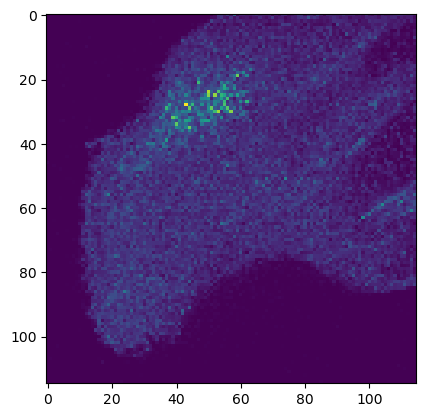

In [16]:
nrows, ncols = 1, 3
fig, ax = plt.subplots(nrows, ncols, sharex=True, sharey=True)

df.sort_values(by=['Blastema width, um'], inplace=True)
plt.imshow( image_2d )